In [1]:
%%capture
!git clone https://github.com/alphaameer007/RHM_FYP

In [2]:
!pip install keras-tcn --no-dependencies 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from tcn import TCN
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [18]:
#df=pd.read_csv('/content/RHM_FYP/TurkeyWindFarm.csv')
df=pd.read_csv('book lstm rnn.csv')
df

,time,wind speed,wind direction,wind energy,mslp,rh,temp
0,1/1/2021 0:00,5.71,269.0,368.0,101506.1200,0.926421,276.749940
1,1/1/2021 0:10,4.41,259.0,360.0,101513.5375,0.933887,276.464513
2,1/1/2021 0:20,3.69,249.0,320.0,101520.9550,0.941352,276.179087
3,1/1/2021 0:30,4.07,245.0,288.0,101528.3725,0.948818,275.893660
4,1/1/2021 0:40,4.59,267.0,256.0,101535.7900,0.956283,275.608233
...,...,...,...,...,...,...,...
52555,12/31/2021 23:10,8.29,168.0,7280.0,102097.2983,0.603113,286.604758
52556,12/31/2021 23:20,8.60,167.0,7352.0,102097.7967,0.604884,286.569317
52557,12/31/2021 23:30,7.81,172.0,7296.0,102098.2950,0.606656,286.533875
52558,12/31/2021 23:40,7.48,181.0,7040.0,102098.7933,0.608428,286.498433


In [ ]:
#df = df[:-288]
df

,time,LV ActivePower (kW),Wind Speed (m/s),wind energy,Wind Direction (°)
0,1/1/2018 0:00,380.047791,5.311336,416.328908,259.994904
1,1/1/2018 0:10,453.769196,5.672167,519.917511,268.641113
2,1/1/2018 0:20,306.376587,5.216037,390.900016,272.564789
3,1/1/2018 0:30,419.645904,5.659674,516.127569,271.258087
4,1/1/2018 0:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
52267,12/29/2018 23:10,58.565510,7.818377,1427.767684,32.237999
52268,12/29/2018 23:20,60.552761,7.782953,1408.261175,33.127121
52269,12/29/2018 23:30,62.694550,8.002207,1531.260701,31.999310
52270,12/29/2018 23:40,92.361504,8.609998,1896.246296,30.943451


In [19]:
df.drop('time', inplace=True, axis=1)

In [20]:
df

,wind speed,wind direction,wind energy,mslp,rh,temp
0,5.71,269.0,368.0,101506.1200,0.926421,276.749940
1,4.41,259.0,360.0,101513.5375,0.933887,276.464513
2,3.69,249.0,320.0,101520.9550,0.941352,276.179087
3,4.07,245.0,288.0,101528.3725,0.948818,275.893660
4,4.59,267.0,256.0,101535.7900,0.956283,275.608233
...,...,...,...,...,...,...
52555,8.29,168.0,7280.0,102097.2983,0.603113,286.604758
52556,8.60,167.0,7352.0,102097.7967,0.604884,286.569317
52557,7.81,172.0,7296.0,102098.2950,0.606656,286.533875
52558,7.48,181.0,7040.0,102098.7933,0.608428,286.498433


In [ ]:
#max_values = df.max()              #normalizing data in between range [0,1]
#df = df.div(max_values) 

In [ ]:
df

,wind speed,wind direction,wind energy,mslp,rh,temp
0,0.193691,0.709763,0.016505,0.981200,0.926421,0.915474
1,0.149593,0.683377,0.016146,0.981272,0.933887,0.914530
2,0.125170,0.656992,0.014352,0.981344,0.941352,0.913585
3,0.138060,0.646438,0.012917,0.981415,0.948818,0.912641
4,0.155699,0.704485,0.011482,0.981487,0.956283,0.911697
...,...,...,...,...,...,...
52555,0.281208,0.443272,0.326516,0.986915,0.603113,0.948073
52556,0.291723,0.440633,0.329745,0.986920,0.604884,0.947956
52557,0.264925,0.453826,0.327234,0.986924,0.606656,0.947838
52558,0.253731,0.477573,0.315752,0.986929,0.608428,0.947721


In [21]:
#switching columns to make LV activePower (kW) last column so that it will be easy
# to prepare training and test datasets
cols = df.columns.tolist()
cols[2], cols[5] = cols[5], cols[2]
df = df[cols]

In [ ]:
df

,wind speed,wind direction,temp,mslp,rh,wind energy
0,0.193691,0.709763,0.915474,0.981200,0.926421,0.016505
1,0.149593,0.683377,0.914530,0.981272,0.933887,0.016146
2,0.125170,0.656992,0.913585,0.981344,0.941352,0.014352
3,0.138060,0.646438,0.912641,0.981415,0.948818,0.012917
4,0.155699,0.704485,0.911697,0.981487,0.956283,0.011482
...,...,...,...,...,...,...
52555,0.281208,0.443272,0.948073,0.986915,0.603113,0.326516
52556,0.291723,0.440633,0.947956,0.986920,0.604884,0.329745
52557,0.264925,0.453826,0.947838,0.986924,0.606656,0.327234
52558,0.253731,0.477573,0.947721,0.986929,0.608428,0.315752


In [22]:
# Calculate the number of readings per day
readings_per_day = 144

#n = number of day
n = 10

# Calculate the sequence length (n days in readings)
sequence_length = readings_per_day * n

# Set the lookback window to be the same as the sequence length
lookback_window = sequence_length

# Convert the data to a NumPy array
df = df.values

x, y = [], []
for i in range(lookback_window, len(df)):
    x.append(df[i - lookback_window:i, :])
    y.append(df[i, -1])
x = np.array(x)
y = np.array(y)

In [ ]:
print(x.shape)
print(y.shape)

(52128, 432, 6)
(52128,)


In [ ]:
print(y)

[0.0326516  0.04736276 0.05023323 ... 0.32723358 0.3157517  0.30965196]


In [ ]:
df[432+1]

array([0.21540027, 0.70448549, 0.91280022, 0.98172128, 0.97726752,
       0.04736276])

In [23]:
# Calculate the number of test samples (last 3 days of the year)
num_test_samples = readings_per_day * 5

# Split the data into training and test sets
x_train = x[:-num_test_samples]
y_train = y[:-num_test_samples]
x_test = x[-num_test_samples:]
y_test = y[-num_test_samples:]

In [24]:
print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)


x_train : (50400, 1440, 6)
x_test : (720, 1440, 6)
y_train : (50400,)
y_test : (720,)


In [ ]:
51840+720

52560

In [ ]:
df[431]

array([0.5493698 , 0.60997117, 1.        , 0.95625377])

In [ ]:
x_train[0]

array([[0.7222129 , 0.21071704, 0.11564692, 0.10502234],
       [0.74623031, 0.22503231, 0.14442153, 0.1253945 ],
       [0.75712948, 0.20693623, 0.10858334, 0.08466405],
       ...,
       [0.19712844, 0.14154479, 0.03086218, 0.02038635],
       [0.19702649, 0.13872388, 0.02403727, 0.0135909 ],
       [0.19692454, 0.13590298, 0.01721236, 0.00679545]])

In [ ]:
df[432]

array([0.54131557, 0.72062099, 1.        , 0.99583008])

In [ ]:
y_train[0]

0.009888632135421493

In [25]:
model = keras.models.Sequential([
    TCN(input_shape=(lookback_window, 6), 
        kernel_size=10,
        nb_filters=32,
        dilations=[1, 2, 4, 8, 16],
        padding='causal',
        activation='relu',
        return_sequences=False,
        nb_stacks=2,
        use_skip_connections=False,
        use_batch_norm=False
        ),
    keras.layers.Dense(1)
])
model.summary()
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_mean_absolute_percentage_error",
    patience=15,
    start_from_epoch=15,
    restore_best_weights=True,
    mode="min"
)
model.compile('adam','mae',metrics=keras.metrics.MeanAbsolutePercentageError())
print('Train...')
history = model.fit(x_train, y_train,
                    epochs=50,
                    verbose=1,validation_data=(x_test,y_test),callbacks=[early_stopping])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn_1 (TCN)                 (None, 32)                197344    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 197,377
Trainable params: 197,377
Non-trainable params: 0
_________________________________________________________________
Train...
Epoch 1/50
1575/1575 [==============================] - 84s 47ms/step - loss: 10429.4199 - mean_absolute_percentage_error: 1543411335168.0000 - val_loss: 704.8350 - val_mean_absolute_percentage_error: 15.1709
Epoch 2/50
1575/1575 [==============================] - 74s 47ms/step - loss: 966.2226 - mean_absolute_percentage_error: 138358358016.0000 - val_loss: 301.8008 - val_mean_absolute_percentage_error: 6.0396
Epoch 3/50
1575/1575 

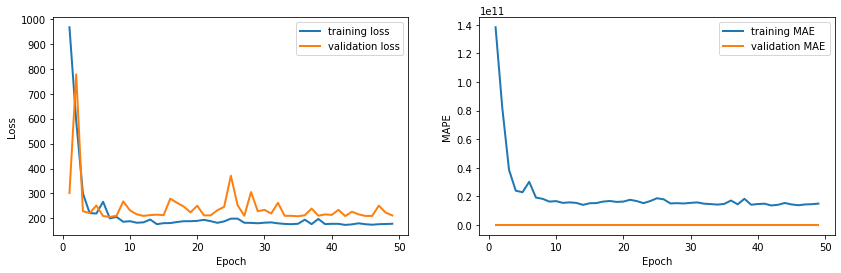

In [26]:
import matplotlib.pyplot as plt
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[1:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[1:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[1:,"mean_absolute_percentage_error"], lw=2, label='training MAE')
plt.plot(logs.loc[1:,"val_mean_absolute_percentage_error"], lw=2, label='validation MAE')
plt.xlabel("Epoch")
plt.ylabel("MAPE")
plt.legend(loc='upper right')
plt.show()

Text(0, 0.5, 'MAPE')

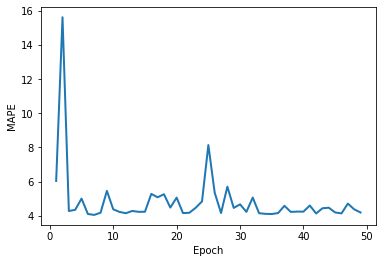

In [27]:
plt.plot(logs.loc[1:,"val_mean_absolute_percentage_error"], lw=2, label='validation MAE')
plt.xlabel("Epoch")
plt.ylabel("MAPE")

In [33]:
p = model.predict(x_test)

23/23 [==============================] - 0s 20ms/step


In [34]:
print(x_test.shape)
print(y_test.shape)
print(p.shape)

(720, 1440, 6)
(720,)
(720, 1)


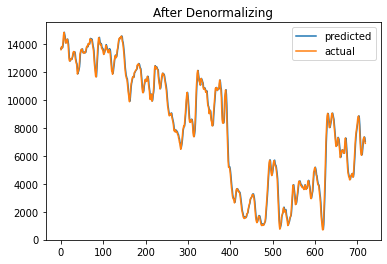

In [35]:
#y_test = y_test*max_values[2] #denormalizing
#predictions = p*max_values[2]
predictions = p
plt.plot(predictions) 
plt.plot(y_test) 
plt.title('After Denormalizing')
plt.legend(['predicted', 'actual'])
plt.show()


In [36]:
predictions = pd.DataFrame(predictions)
actual_data = pd.DataFrame(y_test)
result = pd.concat([actual_data,predictions],axis=1)
result.columns = ['actual_data','predicted_data']

In [37]:
from sklearn.metrics import mean_absolute_percentage_error as mape
  

error = mape(result['actual_data'],result['predicted_data'])
  

print("Mean absolute percentage error : " + str(error))

Mean absolute percentage error : 0.04194545566299897
